# Credit Card Default Prediction and Contributing Factors Analysis

Dataset Overview:
The dataset used for this project contains information on default payments, demographic factors, credit data, and payment history of credit card clients in Taiwan from April 2005 to September 2005. It includes variables such as credit amount, gender, education, marital status, age, repayment status, bill statements, and payment amounts.

Problem Statements:

Credit Default Prediction: The main objective of this project is to develop a robust machine learning model that can accurately predict whether a credit card client is likely to default on their payment next month. By utilizing the available demographic and payment data, we aim to build a predictive model that can assist in identifying potential defaulters and minimizing the associated financial risks for the lending institution.

Identifying Key Contributing Factors: In addition to predicting credit card defaults, we will explore and identify the key factors that contribute to default payment. By analyzing the relationships between demographic variables, repayment behavior, and default status, we aim to gain insights into the most influential factors that impact the likelihood of default. This analysis will help enhance risk assessment models and provide valuable information for credit risk management strategies.

Risk Mitigation Strategies: Based on the identified contributing factors, we will develop data-driven risk mitigation strategies to minimize credit card default rates. By understanding the key predictors of default, we can suggest proactive measures to reduce the occurrence of defaults, such as implementing stricter credit criteria for specific demographic groups, improving payment reminder systems, or offering tailored financial counseling to clients at higher risk.

Dataset Overview:
The dataset used for this project contains information on default payments, demographic factors, credit data, and payment history of credit card clients in Taiwan from April 2005 to September 2005. It includes variables such as credit amount, gender, education, marital status, age, repayment status, bill statements, and payment amounts.


- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
# to display all columns and rows:
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);

# digits after comma --> 2
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
# Filter the warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Data containing loan records
data = pd.read_csv('default of credit card clients.csv', )
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Exploratory Data Analysis

In [3]:
# Get the number of rows and columns
nRow, nCol = data.shape

# Print the dimensions of the dataframe
print(f'The dataset contains {nRow} rows and {nCol} columns')

The dataset contains 30000 rows and 25 columns


In [4]:
#concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
# Rename the 'default.payment.next.month' column to 'default_payment'
# and the 'PAY_0' column to 'PAY_1'
data.rename(columns={'default payment next month': 'default_payment', 'PAY_0': 'PAY_1'}, inplace=True)


In [6]:
# Summary statistics of the dataset
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


In [7]:
# Calculate the number and percentage of missing values for all columns
missing_values_count = data.isnull().sum()
missing_values_pct = round((missing_values_count / len(data)) * 100, 2)

# Create a new DataFrame with the results
result_df = pd.DataFrame({
    'Num Missing Values': missing_values_count,
    'Pct Missing Values': missing_values_pct
})

# Display the results
display(result_df)

,Num Missing Values,Pct Missing Values
ID,0,0.00
LIMIT_BAL,0,0.00
SEX,0,0.00
EDUCATION,0,0.00
MARRIAGE,0,0.00
AGE,0,0.00
PAY_1,0,0.00
PAY_2,0,0.00
PAY_3,0,0.00
PAY_4,0,0.00


In [8]:
#checking for duplicates 
data.duplicated().sum()

0

In [9]:
# #converting categorical variables to their correct data type
# categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# data[categorical_vars] = data[categorical_vars].astype('category')


In [10]:
pay_labels = {-1: 'pay duly', 0: 'no delay', 1: 'delay 1 month', 2: 'delay 2 months', 3: 'delay 3 months',
              4: 'delay 4 months', 5: 'delay 5 months', 6: 'delay 6 months', 7: 'delay 7 months',
              8: 'delay 8 months', 9: 'delay 9+ months'}

data.replace({'PAY_1': pay_labels,
              'PAY_2': pay_labels,
              'PAY_3': pay_labels,
              'PAY_4': pay_labels,
              'PAY_5': pay_labels,
              'PAY_6': pay_labels}, inplace=True)

data.replace({'SEX': {1: 'Male', 2: 'Female'},
              'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others', 5: 'Others', 6: 'Others', 0: 'Others'},
              'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Others', 0: 'Others'}}, inplace=True)


In [11]:
#writing a function that converts the integers to string 
def convert_to_string(df, x):
    """
    This function takes in a dataframe and a 
    variable and converts its data type to a string
    format. 
    df: dataframe
    x: variable 
    """
    df[x] = df[x].astype(str)
    
    return df


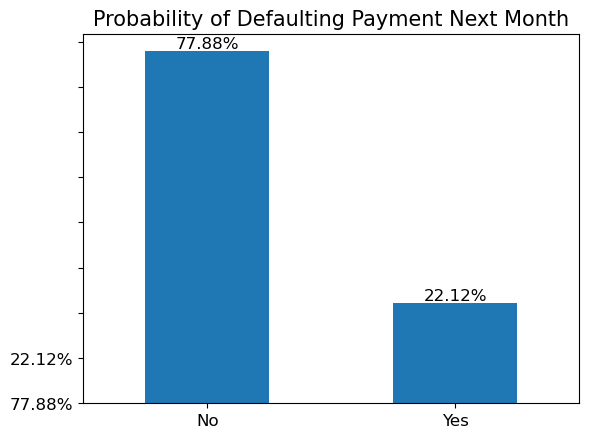

In [12]:
target = (data['default_payment'].value_counts(normalize=True) * 100).round(2)

ax = target.plot(kind='bar', rot=0)
ax.set_xticklabels(['No', 'Yes'], fontsize=12)
ax.set_yticklabels([f'{y}%' for y in target], fontsize=12)
ax.set_title("Probability of Defaulting Payment Next Month", fontsize=15)

for i, v in enumerate(target):
    ax.text(i, v, f'{v}%', fontsize=12, ha='center', va='bottom')

plt.show()


In [13]:
categorical_var = data.select_dtypes(include = "object")
numerical_var = data.select_dtypes(include = np.number)

In [14]:
# Output the columns of the numerical variables
for col in numerical_var :
    print(col)

ID
LIMIT_BAL
AGE
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default_payment


In [15]:
def explor_numerical_var(df, x) :
    
    """ To return the numerical and graphical summary of 
    numerical variables by taking df and x as argument """
        
    print("Summary statistics \n")
    print(df[x].apply([len, min, max, np.mean, np.median, np.std]))
    print("=================================================")
    print(f"Missing values: {df[x].isnull().sum()}")
    print("==================================================")
    plt.figure(figsize = (8, 4))
    #Plot a box plot
    meanpointdrop = dict(marker = "D", markeredgecolor ="black", markerfacecolor ="firebrick")
    medianprops = dict(linestyle ="-.", linewidth = 3, color="gold")
    plt.subplot(1,2,1)
    plt.boxplot(df[x], vert = True, patch_artist = True, notch = True,
            showmeans = True, medianprops = medianprops, meanprops = meanpointdrop)
    plt.xlabel(df[x].name)
    plt.title("Boxplot")

    # plotting a histogram
    plt.subplot(1,2,2)
    plt.hist(df[x], bins = 10)
    plt.title("Histogram")
    plt.tight_layout()
    plt.show()

Summary statistics 

len      30000.00
min         21.00
max         79.00
mean        35.49
median      34.00
std          9.22
Name: AGE, dtype: float64
Missing values: 0


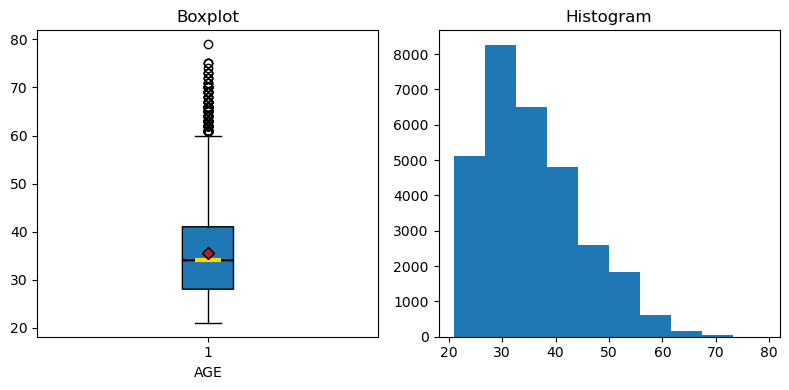

In [16]:
explor_numerical_var(data, "AGE")

Summary statistics 

len        30000.00
min        10000.00
max      1000000.00
mean      167484.32
median    140000.00
std       129747.66
Name: LIMIT_BAL, dtype: float64
Missing values: 0


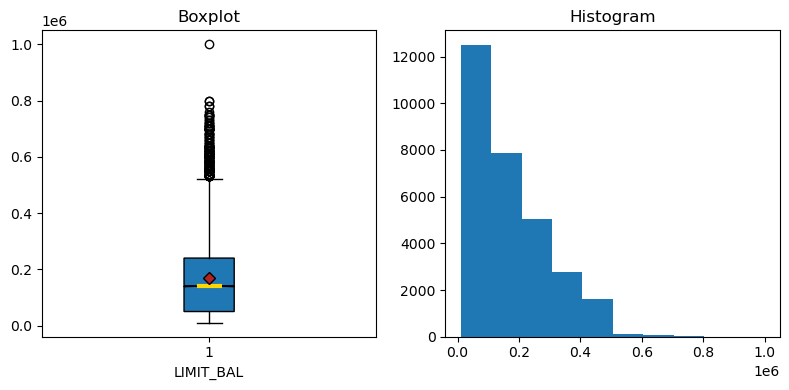

In [17]:
explor_numerical_var(data, "LIMIT_BAL")

In [18]:
#selecting categorical variables for exploration 
cat_df = data[['SEX', 'EDUCATION', 'MARRIAGE']]

# Display the updated DataFrame
cat_df.head()

,SEX,EDUCATION,MARRIAGE
0,Female,University,Married
1,Female,University,Single
2,Female,University,Single
3,Female,University,Married
4,Male,University,Married


In [19]:
def plot_categorical_percentages(df, categorical_vars):
    for var in categorical_vars:
        counts = df[var].value_counts(normalize=True).sort_values(ascending=False) * 100
        plt.bar(counts.index, counts.values)
        for x, y in zip(counts.index, counts.values):
            plt.text(x, y, f'{y:.2f}%', fontsize=12)
        plt.xticks(rotation=60, fontsize=12)  # Rotate x-axis labels by 60 degrees
        plt.yticks(fontsize=12)
        plt.title(f"Percentage of counts for {var}", fontsize=15)
        plt.xlabel(var, fontsize=12)
        plt.ylabel("Percentage", fontsize=12)
        plt.show()


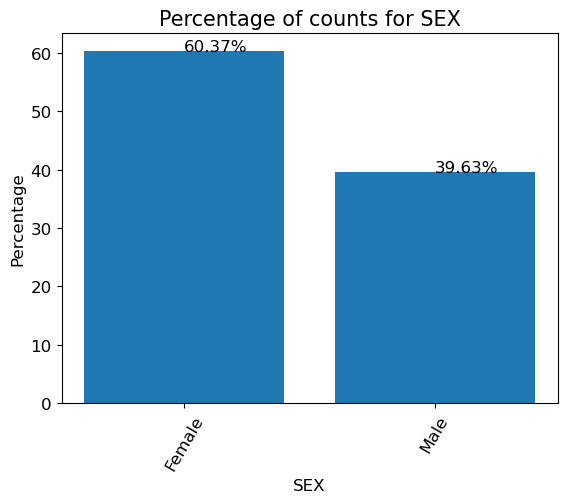

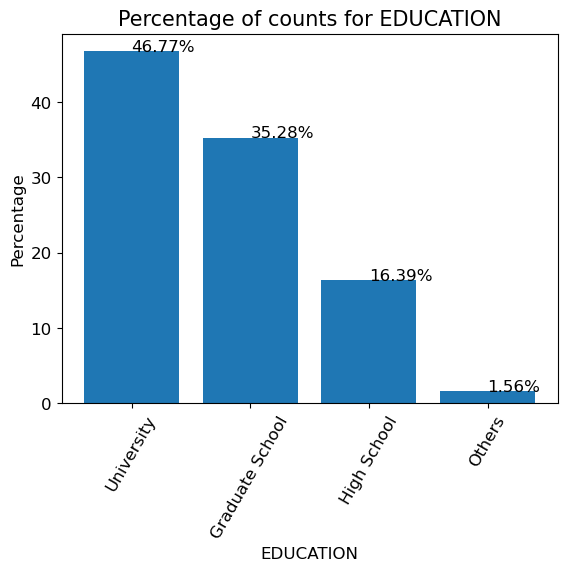

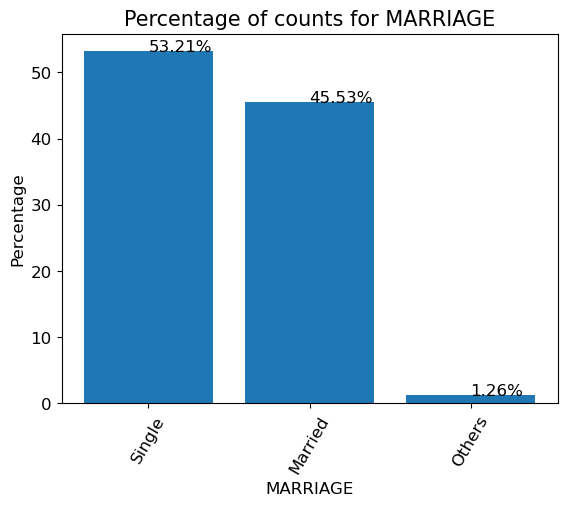

In [20]:
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']
plot_categorical_percentages(data, categorical_vars)


In [21]:
#selecting data for cqisquare test
chisq_df = data[['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment']]

# Display the updated DataFrame
chisq_df.head()


,SEX,EDUCATION,MARRIAGE,default_payment
0,Female,University,Married,1
1,Female,University,Single,1
2,Female,University,Single,0
3,Female,University,Married,0
4,Male,University,Married,0


In [22]:
from scipy.stats import chi2_contingency

def perform_chi2_test(df, categorical_var, target_var):
    # Create the contingency table
    contingency_table = pd.crosstab(df[categorical_var], df[target_var])
    contingency_table.plot.bar()

    # Perform the chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print("Chi-squared:", chi2)
    print("P-value:", p_value)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:", expected)

    # Interpret the results
    if p_value < 0.05:
        print("There is a statistically significant relationship between", categorical_var, "and", target_var)
    else:
        print("There is no statistically significant relationship between", categorical_var, "and", target_var)


Chi-squared: 47.708796890621116
P-value: 4.944678999412026e-12
Degrees of freedom: 1
Expected frequencies: [[14105.6256  4006.3744]
 [ 9258.3744  2629.6256]]
There is a statistically significant relationship between SEX and default_payment


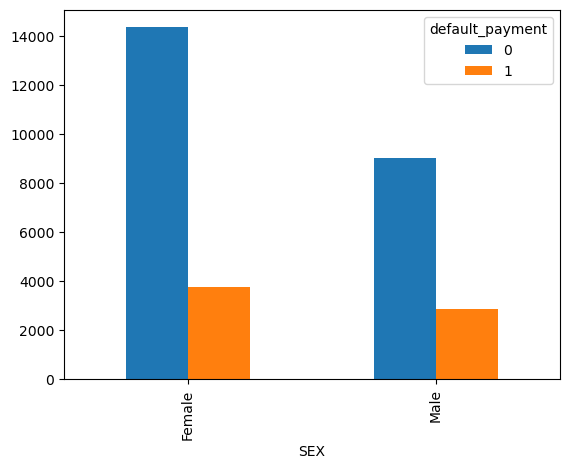

In [23]:
perform_chi2_test(chisq_df, "SEX", "default_payment")

Chi-squared: 160.40995107224546
P-value: 1.4950645648106153e-34
Degrees of freedom: 3
Expected frequencies: [[ 8243.598   2341.402 ]
 [ 3829.3596  1087.6404]
 [  364.4784   103.5216]
 [10926.564   3103.436 ]]
There is a statistically significant relationship between EDUCATION and default_payment


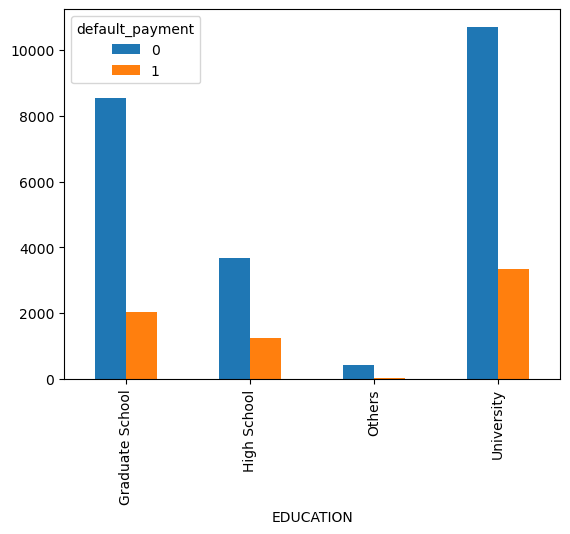

In [24]:
perform_chi2_test(chisq_df, "EDUCATION", "default_payment")

Chi-squared: 28.13032464482199
P-value: 7.790720364202813e-07
Degrees of freedom: 2
Expected frequencies: [[10637.6292  3021.3708]
 [  293.6076    83.3924]
 [12432.7632  3531.2368]]
There is a statistically significant relationship between MARRIAGE and default_payment


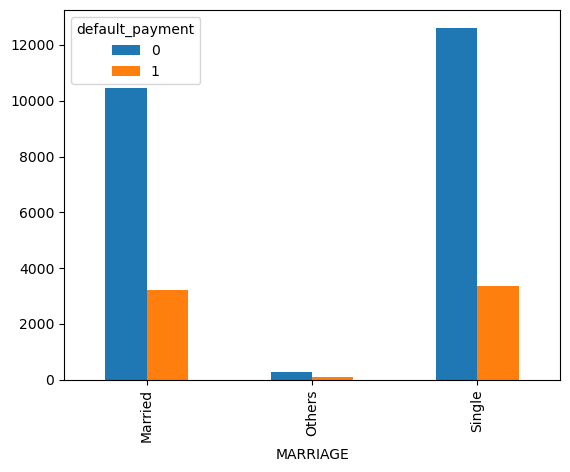

In [25]:
perform_chi2_test(chisq_df, "MARRIAGE", "default_payment")

Therefore, based on the performed chi-square test, we can conclude that there is a statistically significant association between the education level, sex, and marital status variables, and the likelihood of default payment. However, it is important to note that correlation does not imply causation

**Relationship Between Credit Limit Balance and DefaultbPayment**

Defaulters - Mean Limit Balance:  130109.65641952984
Defaulters - Median Limit Balance:  90000.0
Non-Defaulters - Mean Limit Balance:  178099.72607430234
Non-Defaulters - Median Limit Balance:  150000.0


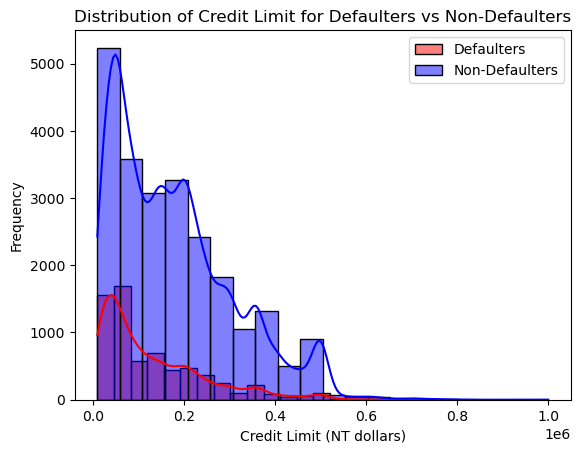

In [26]:
# Subset the data for defaulters and non-defaulters
defaulters = data[data['default_payment'] == 1]
non_defaulters = data[data['default_payment'] == 0]

# Calculate summary statistics
defaulters_limit_mean = defaulters['LIMIT_BAL'].mean()
defaulters_limit_median = defaulters['LIMIT_BAL'].median()
non_defaulters_limit_mean = non_defaulters['LIMIT_BAL'].mean()
non_defaulters_limit_median = non_defaulters['LIMIT_BAL'].median()

# Print the summary statistics
print("Defaulters - Mean Limit Balance: ", defaulters_limit_mean)
print("Defaulters - Median Limit Balance: ", defaulters_limit_median)
print("Non-Defaulters - Mean Limit Balance: ", non_defaulters_limit_mean)
print("Non-Defaulters - Median Limit Balance: ", non_defaulters_limit_median)

# Create histograms for defaulters and non-defaulters
sns.histplot(data=defaulters, x='LIMIT_BAL', bins=20, kde=True, color='red', label='Defaulters')
sns.histplot(data=non_defaulters, x='LIMIT_BAL', bins=20, kde=True, color='blue', label='Non-Defaulters')
plt.xlabel('Credit Limit (NT dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Limit for Defaulters vs Non-Defaulters')
plt.legend()
plt.show()


The statistical inference suggests that there is a difference in the credit limits between defaulters and non-defaulters. Non-defaulters, on average, have higher credit limits and a higher median credit limit compared to defaulters. However, further analysis, including hypothesis testing, would be necessary to determine the significance of these differences and establish the strength of the relationship between credit limit and default payment status.

The Mann-Whitney U test is being used here due to the non-normal distribution of our data, providing a reliable comparison between two independent groups without making assumptions about the underlying distribution.

In [27]:
from scipy.stats import mannwhitneyu

# Separate data for defaulters and non-defaulters
defaulters_data = data[data['default_payment'] == 1]['LIMIT_BAL']
non_defaulters_data = data[data['default_payment'] == 0]['LIMIT_BAL']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(defaulters_data, non_defaulters_data)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)


Mann-Whitney U statistic: 59257217.5
p-value: 1.2255485818223303e-189


The Mann-Whitney U test yielded a U statistic of 59257217.5 and a p-value of 1.2255485818223303e-189. This indicates a statistically significant difference between the two groups being compared. Based on these results, we can infer that there is strong evidence to suggest that there is a difference in the credit amount between defaulters and non-defaulters in the population

Based on the graph, there appears to be a relationship between bill amount and default payment status. It can be observed that customers who do not default on their payments tend to have higher bill amounts compared to those who default.

This suggests that customers with higher bill amounts are more likely to make timely payments and avoid defaulting. On the other hand, customers with lower bill amounts may be facing financial constraints or difficulties in meeting their payment obligations, resulting in a higher likelihood of default.

**Relationship Between Amount of Bill Statement and Default Payment**

We are examining the relationship between the amount of bill statement and default payment to understand if there is any association between these variables. we want to gain a better understanding of the potential impact of bill amounts on the likelihood of default, which can inform risk assessment and management strategies.

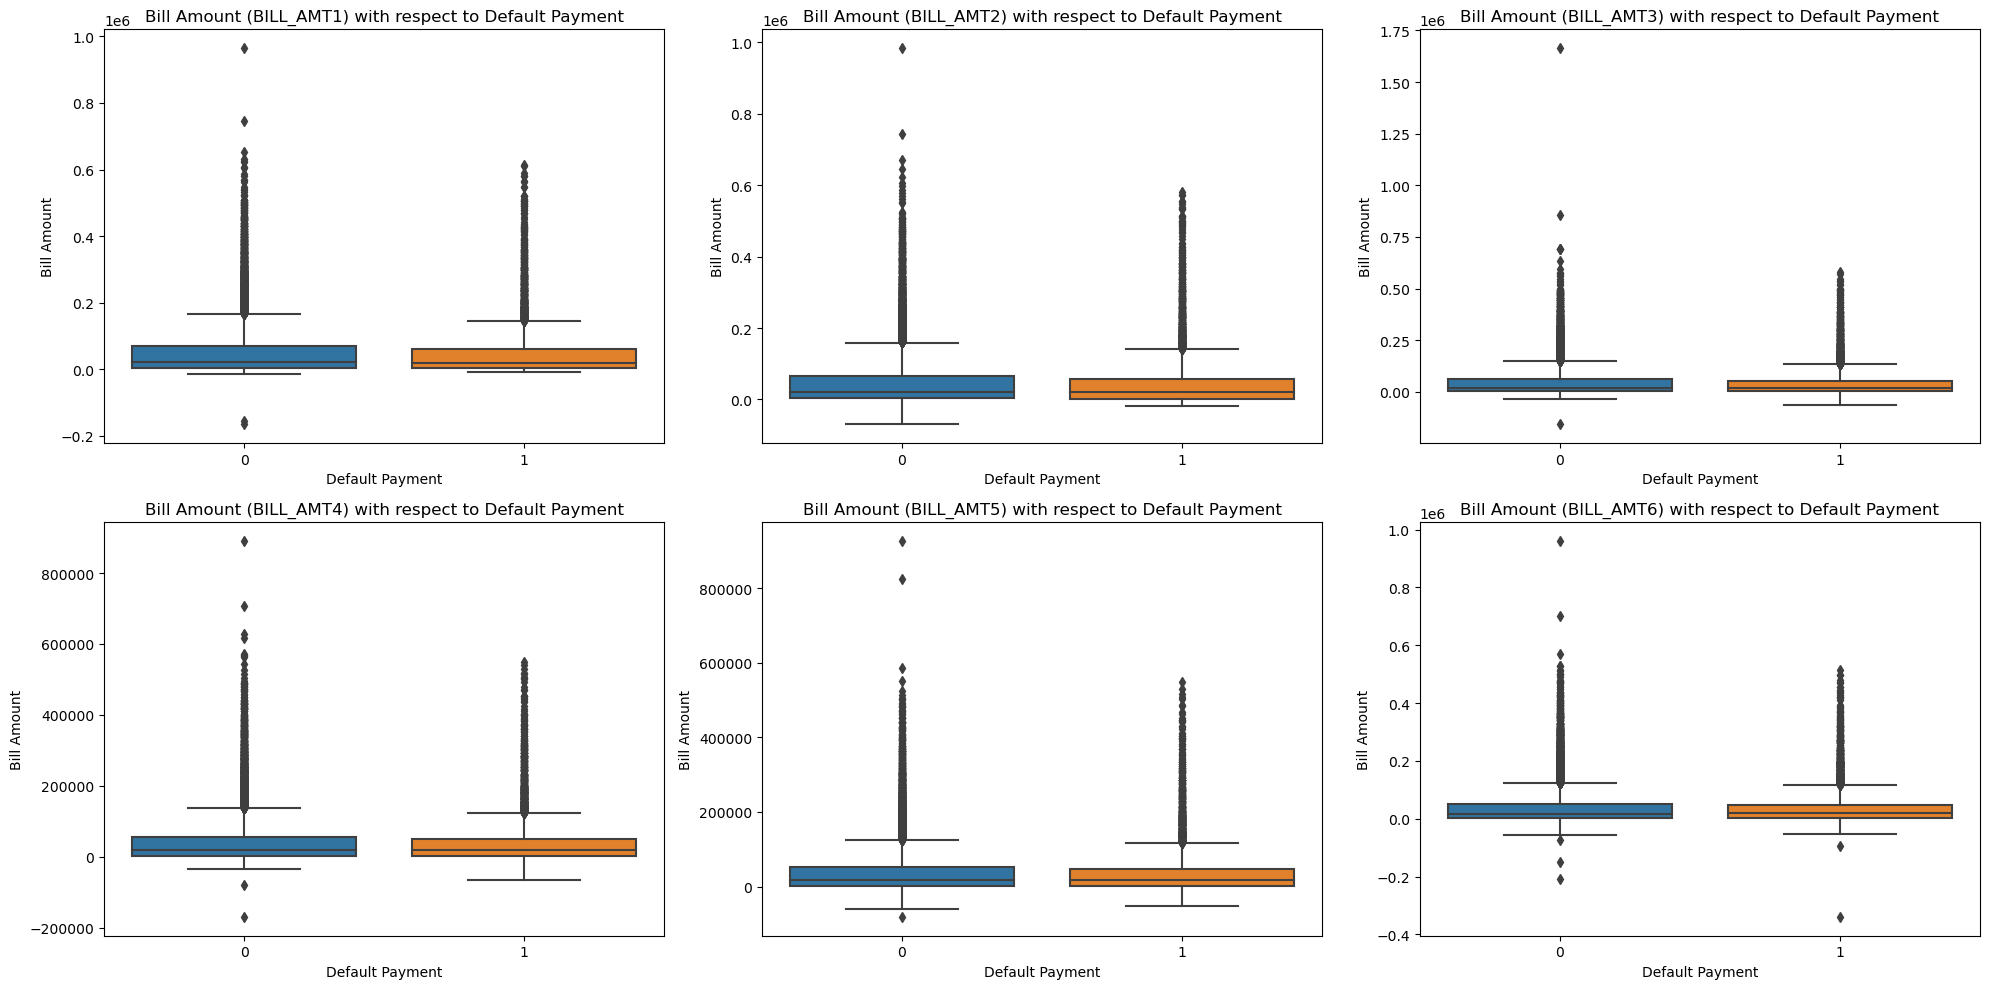

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting bill amount and payment status columns
bill_amounts = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default_payment']]

# Plotting bill amounts for each month with respect to default payment
plt.figure(figsize=(20, 10))
for i, col in enumerate(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=bill_amounts, x='default_payment', y=col)
    plt.xlabel('Default Payment')
    plt.ylabel('Bill Amount')
    plt.title(f'Bill Amount ({col}) with respect to Default Payment')
plt.tight_layout()
plt.show()


**Relationship between payment status and default payment**

We want to the relationship between payment status and default payment. By examining the count of individuals in each payment status category, grouped by default payment status, we can observe patterns and trends. It provides insights into whether certain payment statuses are more prevalent among defaulters compared to non-defaulters

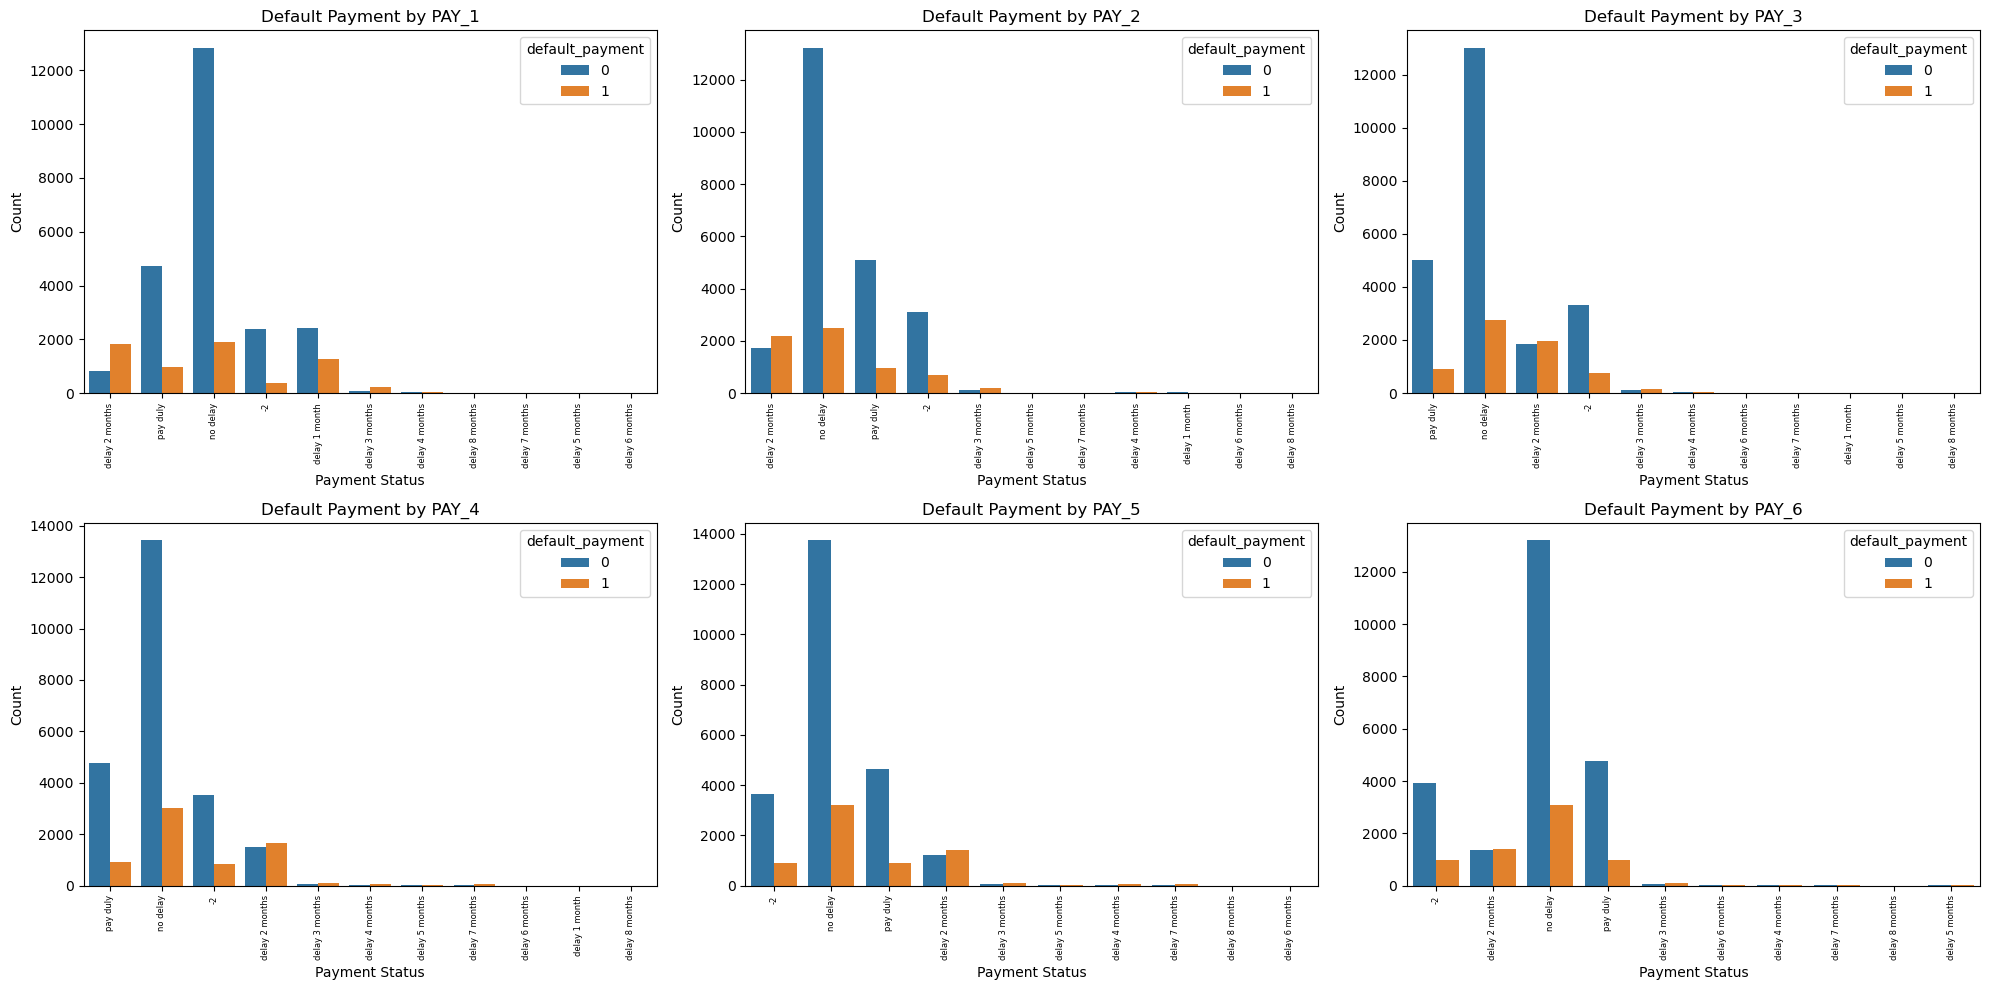

In [29]:
# Selecting payment status columns
payment_status = data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_payment']]

# Countplot of payment status for each month with respect to default payment
plt.figure(figsize=(20, 10))
for i, col in enumerate(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=payment_status, x=col, hue='default_payment')
    plt.xlabel('Payment Status')
    plt.ylabel('Count')
    plt.xticks(rotation=90, fontsize=6)
    plt.title(f'Default Payment by {col}')
plt.tight_layout()
plt.show()


From the graph, it can be observed that the majority of customers have a payment status of 0 for all payment periods (PAY_1 to PAY_6). A payment status of 0 indicates that the customer has made the payment duly.

However, for customers who default on their payments (defaulters), there is a higher proportion of individuals with payment statuses of 2 and below. These payment statuses indicate delayed payments, with higher numbers representing longer delays.

Specifically, a payment status of 1 indicates a payment delay of one month, 2 indicates a delay of two months, and so on. The highest payment status value of 8 represents a delay of eight months, while a value of 9 or above represents a delay of nine months or more.

Therefore, based on our project, the graph suggests that customers who default on their payments are more likely to have a history of payment delays, with longer delays indicating a higher risk of defaulting

**Relationship Between Payment Amount and Default Payment**

We want to visualize any differences in payment amounts between defaulters and non-defaulters across different payment statuses.

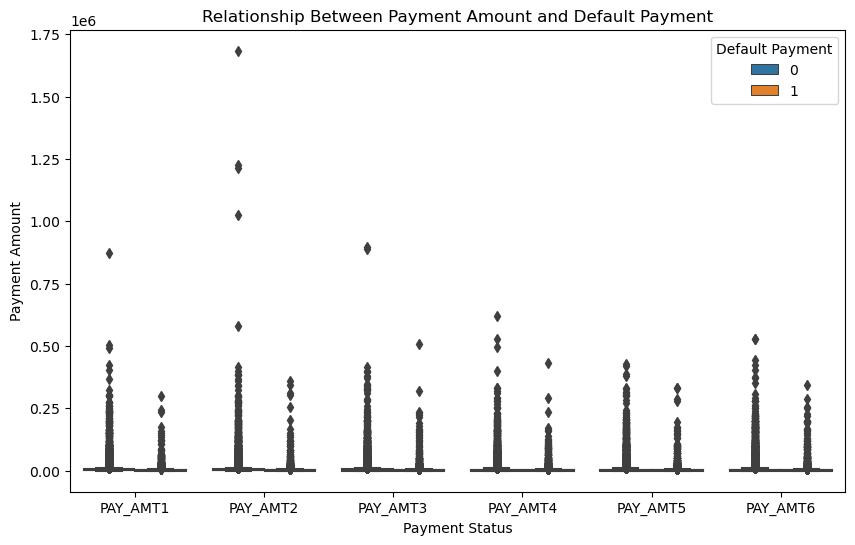

In [30]:
# Select the relevant columns
payment_amount = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment']]

# Melt the dataframe to long format for plotting
payment_amount_melted = payment_amount.melt(id_vars='default_payment', value_vars=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
                                            var_name='Payment_Status', value_name='Payment_Amount')

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=payment_amount_melted, x='Payment_Status', y='Payment_Amount', hue='default_payment')
plt.xlabel('Payment Status')
plt.ylabel('Payment Amount')
plt.title('Relationship Between Payment Amount and Default Payment')
plt.legend(title='Default Payment', loc='upper right')
plt.show()


**Feature Engineering**

In [31]:
# # Create new variables for aggregated bill statement amount and previous payment amount
# data['TOTAL_BILL_AMT'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
# data['TOTAL_PAY_AMT'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)


Aggregating the bill statement amounts and previous payment amounts into two variables provides a more concise representation of the overall financial behavior of each individual. Instead of considering the individual monthly amounts separately, aggregating them into totals allows you to capture the cumulative financial activity of the individuals over the specified time period. This aggregation can help simplify the dataset, reduce dimensionality, and potentially uncover patterns or trends in the total bill statement amount and total payment amount that are more meaningful for your analysis

In [32]:
# #let's drop the columns we aggregated 
# data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE_BIN'], axis=1, inplace=True)


In [33]:
# # Select the numerical variables
# numerical_vars = ['LIMIT_BAL', 'AGE', 'TOTAL_BILL_AMT', 'TOTAL_PAY_AMT']

# # Create a correlation matrix
# correlation_matrix = data[numerical_vars].corr()
# plt.figure(figsize=(8, 6))

# # Plot the heatmap

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

The correlation analysis shows that there is a weak positive relationship between credit limit and age. Additionally, moderate positive correlations exist between credit limit and both total bill amount and total payment amount. Age has a weak positive correlation with the total bill amount, while the correlation between age and total payment amount is very weak. Furthermore, the total bill amount and total payment amount demonstrate a moderate positive correlation. It is important to note that correlation does not imply causation

**Data Preprocessing with OneHotEncoder**

In [34]:
# Select categorical variables
categorical_vars = data.select_dtypes(include=['category']).columns.tolist()
categorical_vars

[]

In [35]:
data = pd.get_dummies(data,columns=['EDUCATION','MARRIAGE', "SEX", 'PAY_1','PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6'], drop_first = True )


The reason for using OneHotEncoder is that it is suitable for encoding categorical variables with more than two unique values, especially when the labels are nominal and not ordinal. OneHotEncoder creates binary columns for each unique category, representing the presence or absence of that category. This encoding scheme ensures that there is no inherent order or hierarchy among the categories, allowing the encoded variables to be used in machine learning models that require numerical inputs.

In [36]:
data.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,SEX_Male,PAY_1_delay 1 month,PAY_1_delay 2 months,PAY_1_delay 3 months,PAY_1_delay 4 months,PAY_1_delay 5 months,PAY_1_delay 6 months,PAY_1_delay 7 months,PAY_1_delay 8 months,PAY_1_no delay,PAY_1_pay duly,PAY_2_delay 1 month,PAY_2_delay 2 months,PAY_2_delay 3 months,PAY_2_delay 4 months,PAY_2_delay 5 months,PAY_2_delay 6 months,PAY_2_delay 7 months,PAY_2_delay 8 months,PAY_2_no delay,PAY_2_pay duly,PAY_3_delay 1 month,PAY_3_delay 2 months,PAY_3_delay 3 months,PAY_3_delay 4 months,PAY_3_delay 5 months,PAY_3_delay 6 months,PAY_3_delay 7 months,PAY_3_delay 8 months,PAY_3_no delay,PAY_3_pay duly,PAY_4_delay 1 month,PAY_4_delay 2 months,PAY_4_delay 3 months,PAY_4_delay 4 months,PAY_4_delay 5 months,PAY_4_delay 6 months,PAY_4_delay 7 months,PAY_4_delay 8 months,PAY_4_no delay,PAY_4_pay duly,PAY_5_delay 2 months,PAY_5_delay 3 months,PAY_5_delay 4 months,PAY_5_delay 5 months,PAY_5_delay 6 months,PAY_5_delay 7 months,PAY_5_delay 8 months,PAY_5_no delay,PAY_5_pay duly,PAY_6_delay 2 months,PAY_6_delay 3 months,PAY_6_delay 4 months,PAY_6_delay 5 months,PAY_6_delay 6 months,PAY_6_delay 7 months,PAY_6_delay 8 months,PAY_6_no delay,PAY_6_pay duly
0,1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


**Data Scaling with Standard Scaler**

By standardizing the data, we ensure that the features are treated fairly and contribute equally to the learning process, resulting in more reliable and accurate machine learning models.

In [37]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE', 'TOTAL_BILL_AMT']])
# scaled_df = pd.DataFrame(scaled_data, columns=['LIMIT_BAL_scaled', 'AGE_scaled', 'TOTAL_BILL_AMT_scaled', 'TOTAL_PAY_AMT_scaled'])
# data = pd.concat([data, scaled_df], axis=1)
# data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE'], axis=1, inplace=True)
# data.head()

In [38]:
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled
columns_to_scale = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE', 'LIMIT_BAL']

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(data[columns_to_scale])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=[f'{col}_scaled' for col in columns_to_scale])

# Concatenate the scaled DataFrame with the original data
data = pd.concat([data, scaled_df], axis=1)

# Drop the original columns that were scaled
data.drop(columns_to_scale, axis=1, inplace=True)
data.head()

,ID,default_payment,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,SEX_Male,PAY_1_delay 1 month,PAY_1_delay 2 months,PAY_1_delay 3 months,PAY_1_delay 4 months,PAY_1_delay 5 months,PAY_1_delay 6 months,PAY_1_delay 7 months,PAY_1_delay 8 months,PAY_1_no delay,PAY_1_pay duly,PAY_2_delay 1 month,PAY_2_delay 2 months,PAY_2_delay 3 months,PAY_2_delay 4 months,PAY_2_delay 5 months,PAY_2_delay 6 months,PAY_2_delay 7 months,PAY_2_delay 8 months,PAY_2_no delay,PAY_2_pay duly,PAY_3_delay 1 month,PAY_3_delay 2 months,PAY_3_delay 3 months,PAY_3_delay 4 months,PAY_3_delay 5 months,PAY_3_delay 6 months,PAY_3_delay 7 months,PAY_3_delay 8 months,PAY_3_no delay,PAY_3_pay duly,PAY_4_delay 1 month,PAY_4_delay 2 months,PAY_4_delay 3 months,PAY_4_delay 4 months,PAY_4_delay 5 months,PAY_4_delay 6 months,PAY_4_delay 7 months,PAY_4_delay 8 months,PAY_4_no delay,PAY_4_pay duly,PAY_5_delay 2 months,PAY_5_delay 3 months,PAY_5_delay 4 months,PAY_5_delay 5 months,PAY_5_delay 6 months,PAY_5_delay 7 months,PAY_5_delay 8 months,PAY_5_no delay,PAY_5_pay duly,PAY_6_delay 2 months,PAY_6_delay 3 months,PAY_6_delay 4 months,PAY_6_delay 5 months,PAY_6_delay 6 months,PAY_6_delay 7 months,PAY_6_delay 8 months,PAY_6_no delay,PAY_6_pay duly,BILL_AMT1_scaled,BILL_AMT2_scaled,BILL_AMT3_scaled,BILL_AMT4_scaled,BILL_AMT5_scaled,BILL_AMT6_scaled,PAY_AMT1_scaled,PAY_AMT2_scaled,PAY_AMT3_scaled,PAY_AMT4_scaled,PAY_AMT5_scaled,PAY_AMT6_scaled,AGE_scaled,LIMIT_BAL_scaled
0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.64,-0.65,-0.67,-0.67,-0.66,-0.65,-0.34,-0.23,-0.30,-0.31,-0.31,-0.29,-1.25,-1.14
1,2,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,-0.66,-0.67,-0.64,-0.62,-0.61,-0.60,-0.34,-0.21,-0.24,-0.24,-0.31,-0.18,-1.03,-0.37
2,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.30,-0.49,-0.48,-0.45,-0.42,-0.39,-0.25,-0.19,-0.24,-0.24,-0.25,-0.01,-0.16,-0.60
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.06,-0.01,0.03,-0.23,-0.19,-0.16,-0.22,-0.17,-0.23,-0.24,-0.24,-0.24,0.16,-0.91
4,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.58,-0.61,-0.16,-0.35,-0.35,-0.33,-0.22,1.34,0.27,0.27,-0.27,-0.26,2.33,-0.91


### Model Building

In [39]:
# selecting independent variables
X = data.drop(['ID', 'default_payment'], axis=1)
#selecting the dependent/target variable 
y = data['default_payment']


In [40]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of records in each set
print("Train set records:", X_train.shape[0])
print("Test set records:", X_test.shape[0])


Train set records: 24000
Test set records: 6000


**Over Sampling with SMOTE**

The reason for performing oversampling is to address the class imbalance issue. By generating synthetic samples for the minority class, we provide the model with more balanced training data, enabling it to learn effectively from both classes and make more accurate predictions.

In [41]:
# from imblearn.over_sampling import SMOTE

# # Perform oversampling
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


Lazy Predict is a helpful tool that provides a quick overview of how various machine learning algorithms may perform on a given dataset. It saves time by automatically evaluating multiple algorithms and generating preliminary performance metrics, such as accuracy, precision, recall, and F1-score, without requiring extensive manual configuration. While Lazy Predict provides a convenient starting point for assessing algorithm suitability, it's important to note that further tuning and customization may be necessary to optimize model performance for a specific problem. It serves as an initial guide to explore the potential of different algorithms and narrow down the selection for more focused experimentation and refinement.

In [42]:
# #using the lazy predict to get 
# from lazypredict.Supervised import LazyClassifier
# ##getting an overview for the performance for each of the regression algorithms
# reg = LazyClassifier(verbose = True, ignore_warnings = True, custom_metric = None)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# #performace for each model
# pd.DataFrame(models)

**Logistic Regression**

Logistic Regression is a popular classification algorithm that models the relationship between the independent variables and the probability of a categorical outcome. It is suitable for binary classification problems and provides interpretable results.

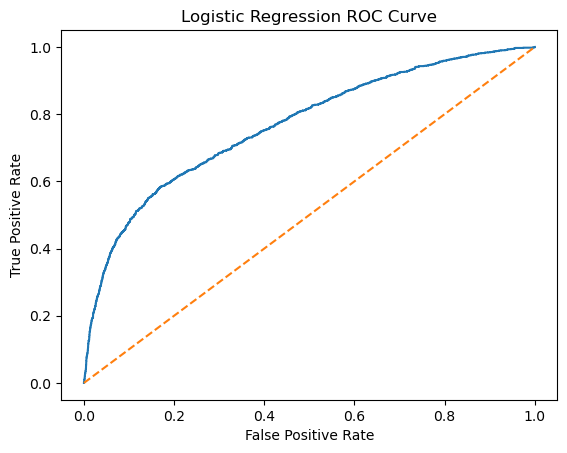

Logistic Regression Accuracy: 0.8188333333333333
Logistic Regression F1-score: 0.4562281140570285
Logistic Regression ROC AUC score: 0.6491121835427869


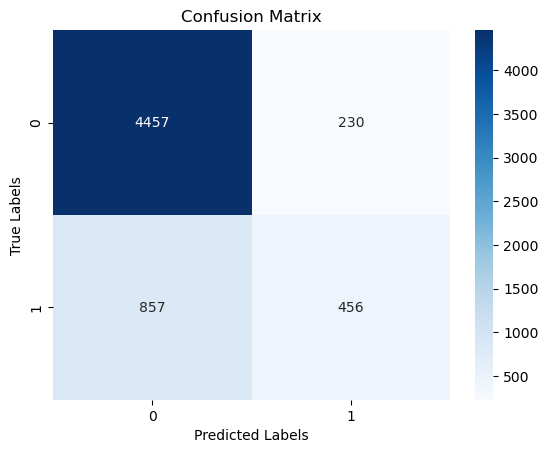

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Initialize the model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
logreg_preds = logreg_model.predict(X_test)

# Evaluate the model
logreg_acc = accuracy_score(y_test, logreg_preds)
logreg_f1 = f1_score(y_test, logreg_preds)
logreg_roc_auc = roc_auc_score(y_test, logreg_preds)

# Plot ROC curve
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, logreg_probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# Print the evaluation results
print("Logistic Regression Accuracy:", logreg_acc)
print("Logistic Regression F1-score:", logreg_f1)
print("Logistic Regression ROC AUC score:", logreg_roc_auc)

# Compute confusion matrix
cm = confusion_matrix(y_test, logreg_preds)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Random Forest**

andom Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It is robust against overfitting and can handle both classification and regression tasks. Random Forests are effective in capturing complex relationships and handling large feature spaces.

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

ROC AUC Score: 0.653178217659287


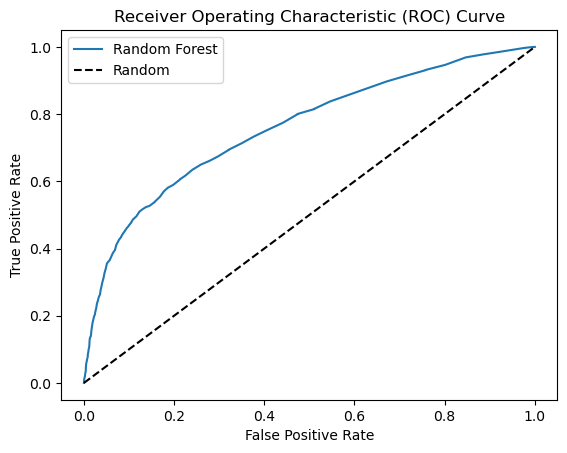

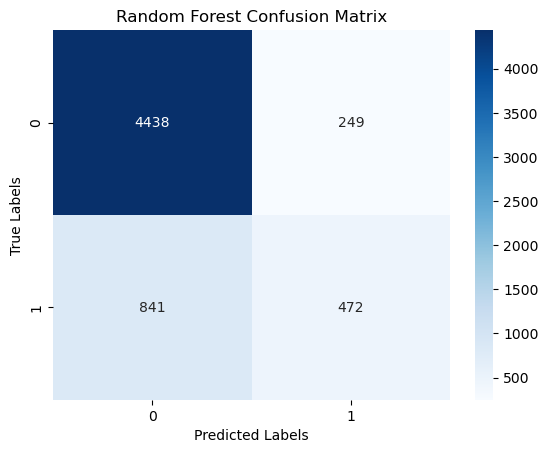

0.464110127826942
0.653178217659287


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate model performance
print("Random Forest Classifier:")
print(classification_report(y_test, rf_preds))
print("ROC AUC Score:", roc_auc_score(y_test, rf_preds))

# Compute probabilities for ROC curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Compute confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot confusion matrix as heatmap
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Predict using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate F1 score and ROC AUC score for Random Forest
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f1_rf)
print(roc_auc_rf)

**XGBoost Classifier**

XGBoost (eXtreme Gradient Boosting) is a powerful gradient boosting algorithm that excels in performance and accuracy. It sequentially trains an ensemble of weak learners, gradually improving the model's predictive capability. XGBoost is known for its scalability, speed, and ability to handle various data types.

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

ROC AUC Score: 0.656573146934099


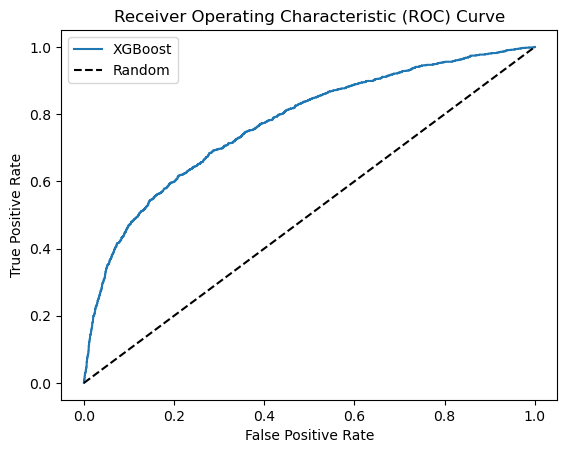

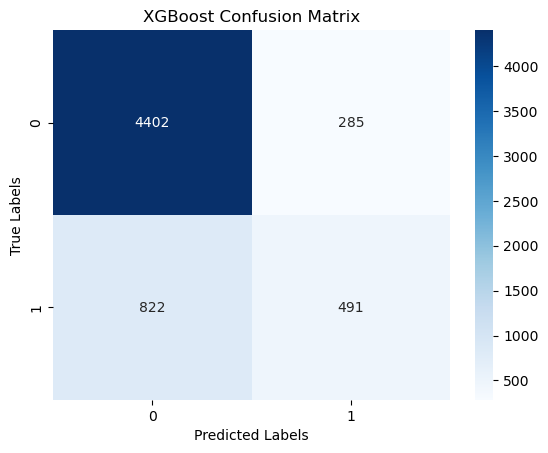

f1_xgb: 0.47008137865007177
roc_auc_xgb: 0.656573146934099


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluate model performance
print("XGBoost Classifier:")
print(classification_report(y_test, xgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_preds))

# Compute probabilities for ROC curve
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Compute confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_preds)

# Plot confusion matrix as heatmap
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate F1 score and ROC AUC score for XGBoost
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print('f1_xgb:',  f1_xgb)
print('roc_auc_xgb:', roc_auc_xgb)

**Support Vector Machine**

SVM is a versatile algorithm used for both classification and regression tasks. It constructs a hyperplane to separate data points into different classes while maximizing the margin between them. SVMs are effective in high-dimensional spaces and can handle complex decision boundaries. They are particularly useful when dealing with smaller datasets.

In [46]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Calculate F1 score and ROC AUC score for SVM
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)


In [47]:
from sklearn.metrics import f1_score, roc_auc_score

# Define a dictionary to store the scores
scores = {'Logistic Regression': [logreg_f1, logreg_roc_auc],
          'Random Forest': [f1_rf, roc_auc_rf],
          'XGBoost': [f1_xgb, roc_auc_xgb],
          'SVM': [f1_svm, roc_auc_svm]}

# Create a DataFrame to display the scores
score_table = pd.DataFrame(scores, index=['F1 Score', 'ROC AUC Score'])

# Display the score table
score_table


,Logistic Regression,Random Forest,XGBoost,SVM
F1 Score,0.46,0.46,0.47,0.43
ROC AUC Score,0.65,0.65,0.66,0.64


**Hyperparameter Tuning XGBoost Classifier**

In [48]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Create an XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Create GridSearchCV object for hyperparameter tuning
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# # Perform hyperparameter tuning
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)


XGBoost Model Evaluation:
Accuracy: 0.8190
F1 Score: 0.4554
ROC AUC Score: 0.6487


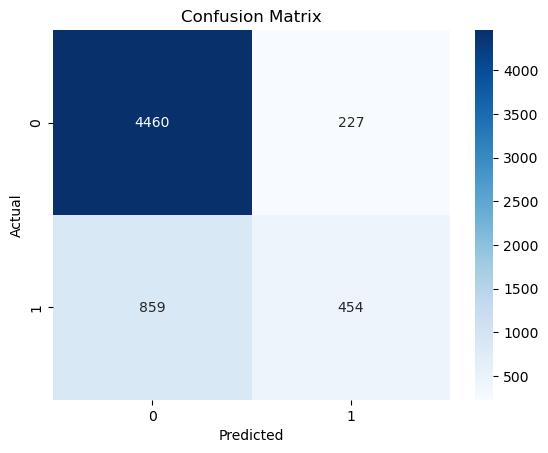

In [49]:
import xgboost as xgb

# Create the XGBoost classifier with the best hyperparameter values
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Feature Importance**

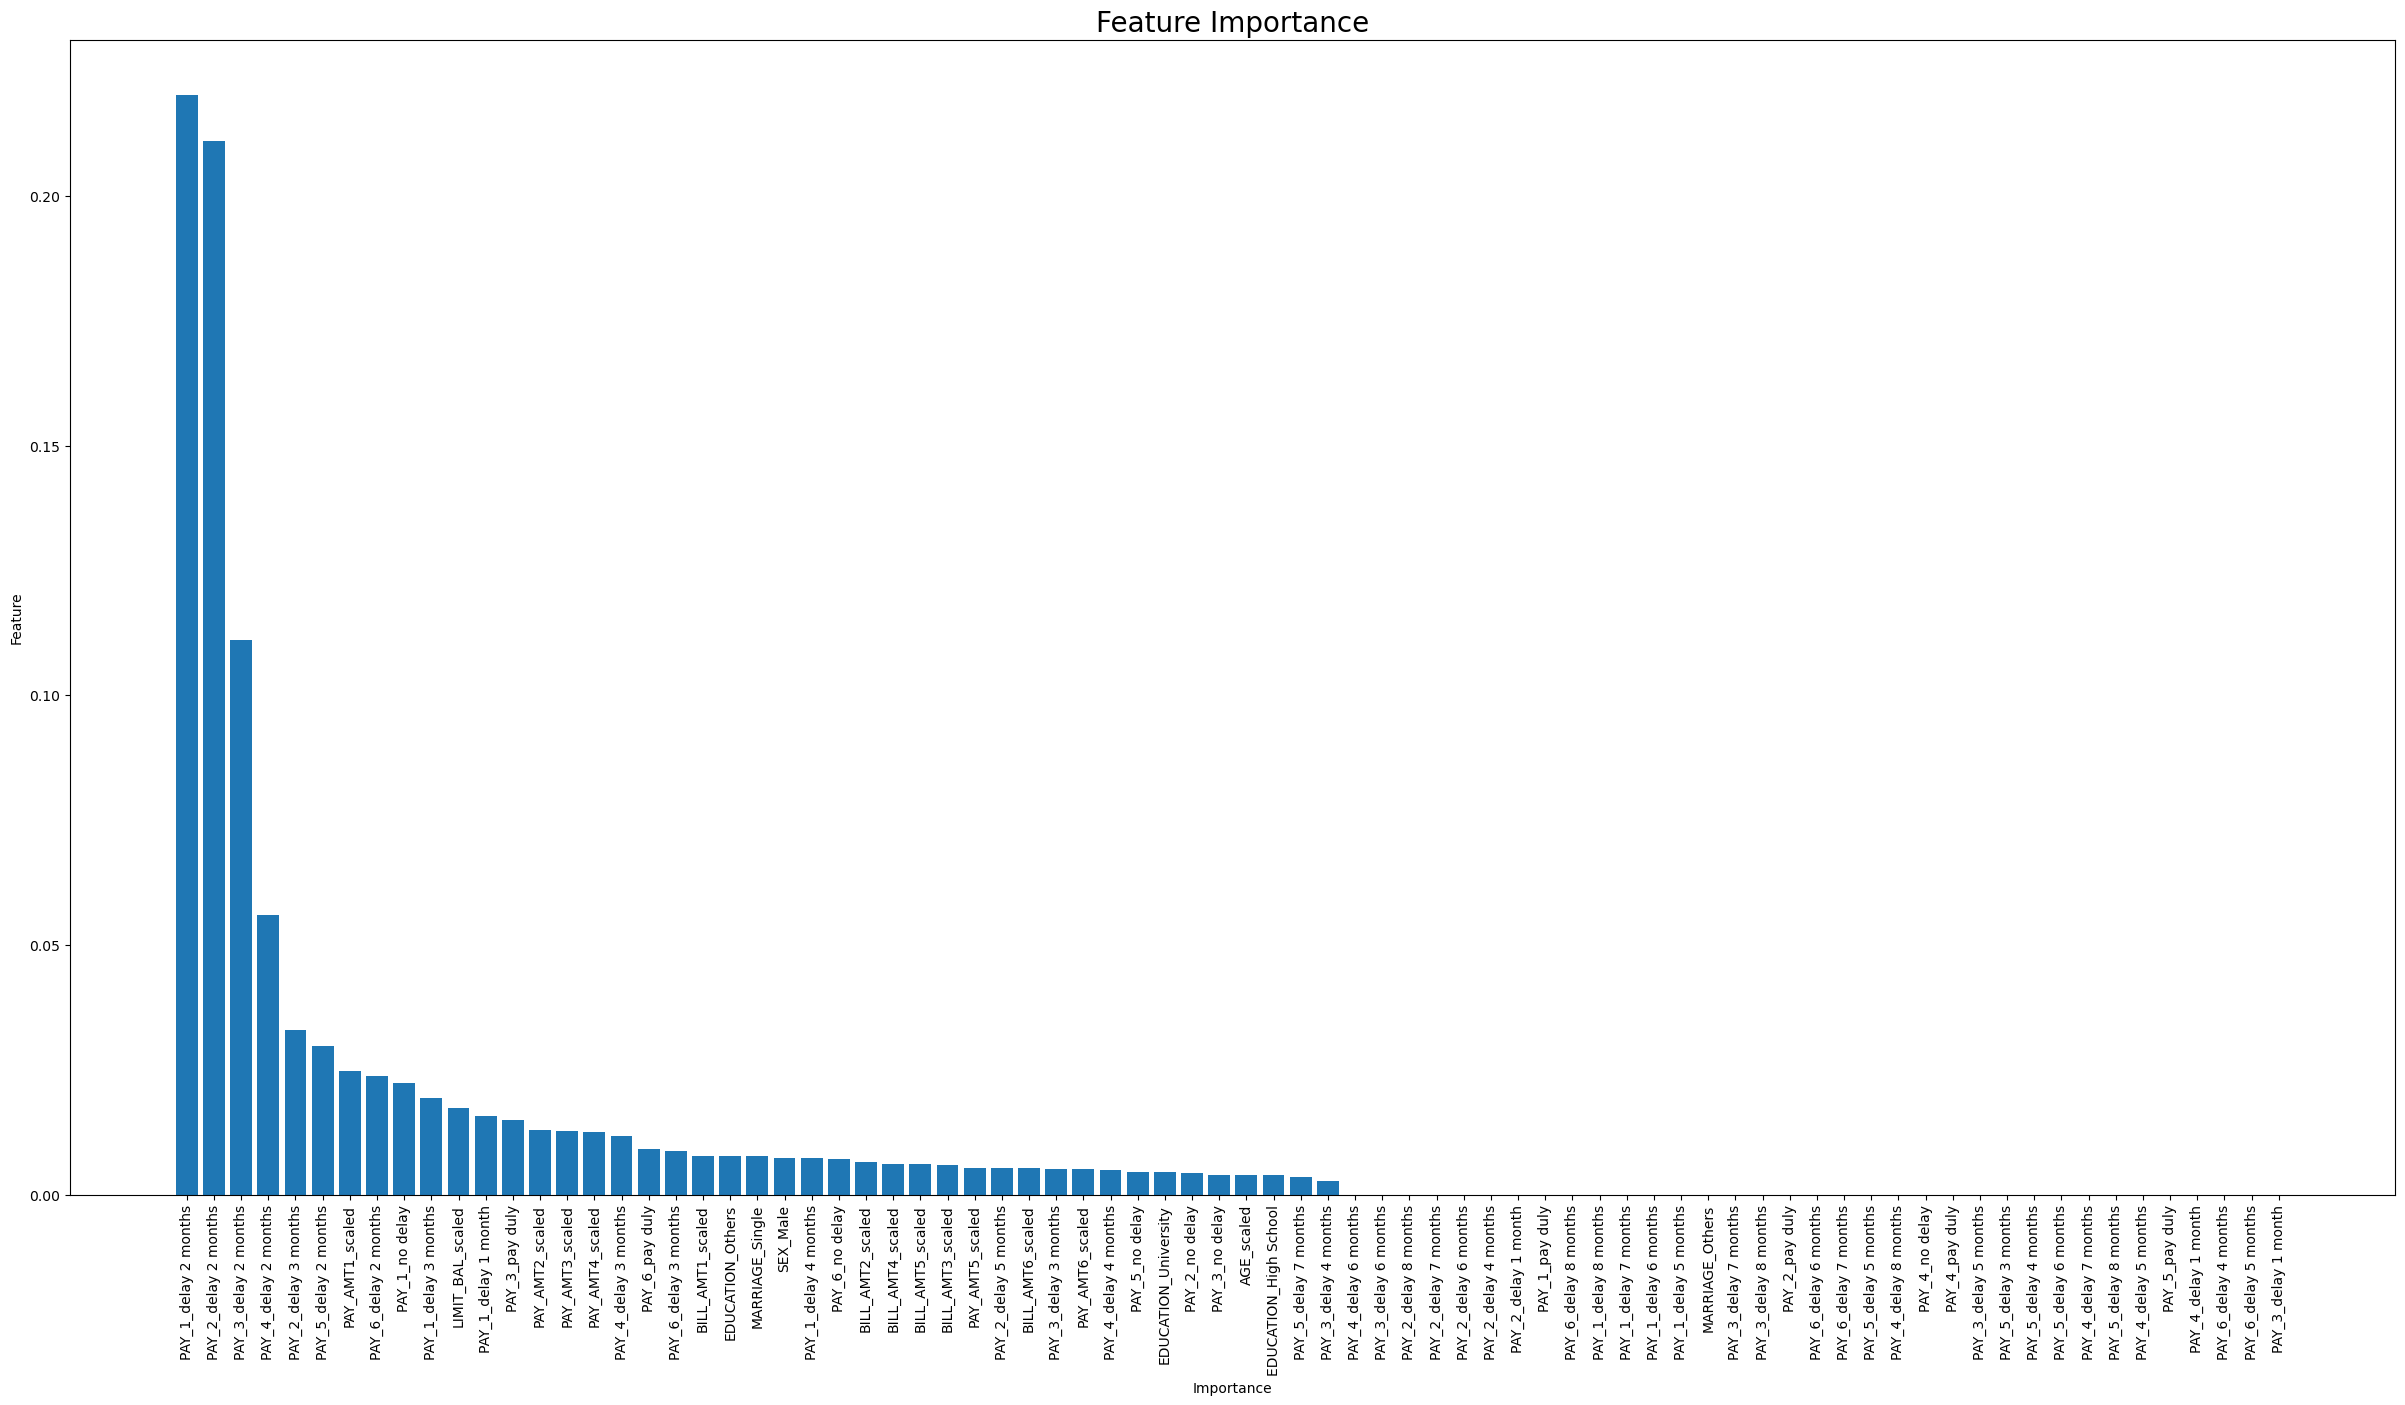

In [50]:
# Train XGBoost model and obtain the feature importance scores

feature_importance = xgb_model.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by their importance scores in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(30, 15))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize = 20)
plt.show()


Based on the feature importance scores, we can observe that the payment delay of 2 months for PAY_1 has the highest importance score of 0.29. This suggests that the payment delay of 2 months in the previous month is a crucial factor in predicting the default payment. Additionally, the payment delays of 2 months in PAY_2, PAY_3, PAY_4, and PAY_5 also show moderate importance scores ranging from 0.19 to 0.04. The payment delay variables seem to be the most important features in predicting default payments